In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
from shapely.ops import unary_union
import contextily as ctx

## Get the Netherlands based on regions
netherlands = ox.geocode_to_gdf(["Groningen", "Friesland", "Drenthe", "Overijssel", "Gelderland", "Flevoland", {'state':'Utrecht'} , "North Holland", "South Holland", "Zeeland", "North Brabant", "Limburg"])
ax = ox.project_gdf(netherlands).plot()
_ = ax.axis('off')

#### Eg city as point
cty = ox.geocode_to_gdf("London, UK")
cty
#### Fix using which_results
cty = ox.geocode_to_gdf("London, UK", which_result=2)
cty

utrecht = ox.geocode_to_gdf({'state':'Utrecht'})
utrecht = ox.project_gdf(mexico).plot()
_ = utrecht.axis('off')
#type(mexico['geometry'].iloc[0])

## Get the Netherlands based on placed
netherlands.to_file('./Netherlands/maps.shp')

In [2]:
## Load shape file
nl = gpd.read_file("./Netherlands/maps.shp")
nl.head()

,place_name,bbox_north,bbox_south,bbox_east,bbox_west,geometry
0,"Groningen, Netherlands, The Netherlands",53.264947,53.178610,6.666873,6.462746,"POLYGON ((6.46275 53.20198, 6.46314 53.20220, ..."
1,"Friesland, Netherlands, The Netherlands",53.539713,52.764805,6.427615,4.818376,"POLYGON ((4.81838 53.21427, 4.83319 53.22633, ..."
2,"Drenthe, Netherlands, The Netherlands",53.203832,52.612195,7.092740,6.119820,"POLYGON ((6.11982 52.85422, 6.12051 52.85447, ..."
3,"Overijssel, Netherlands, The Netherlands",52.854215,52.118069,7.072763,5.777750,"POLYGON ((5.77775 52.58300, 5.77797 52.60753, ..."
4,"Gelderland, Netherlands, The Netherlands",52.522025,51.733581,6.832802,4.993855,"POLYGON ((4.99385 51.86071, 4.99385 51.86075, ..."


In [3]:
## Number of regions
len(nl)

12

In [4]:
## Geometry of regions
nl['geometry']

0     POLYGON ((6.46275 53.20198, 6.46314 53.20220, ...
1     POLYGON ((4.81838 53.21427, 4.83319 53.22633, ...
2     POLYGON ((6.11982 52.85422, 6.12051 52.85447, ...
3     POLYGON ((5.77775 52.58300, 5.77797 52.60753, ...
4     POLYGON ((4.99385 51.86071, 4.99385 51.86075, ...
5     POLYGON ((5.06043 52.57894, 5.07459 52.58367, ...
6     POLYGON ((4.79204 52.12231, 4.79206 52.12238, ...
7     POLYGON ((4.47765 52.33251, 4.47919 52.33473, ...
8     POLYGON ((3.77368 51.78152, 3.80174 51.79670, ...
9     POLYGON ((3.30794 51.43337, 3.32030 51.45825, ...
10    MULTIPOLYGON (((4.19012 51.60275, 4.19028 51.6...
11    POLYGON ((5.56605 51.22091, 5.57173 51.22194, ...
Name: geometry, dtype: geometry

<AxesSubplot:>

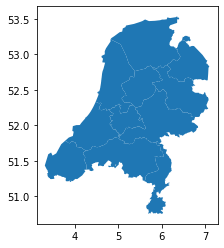

In [5]:
nl.plot()

In [6]:
## Coordinate reference system
nl.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

epsg:4326
+proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


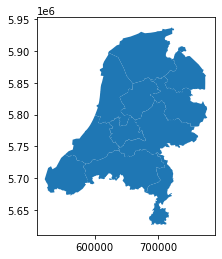

In [7]:
## Convert to gdf so that it can divide into grids
## If shape is not converted cannot do quadrat cut
holland = ox.project_gdf(nl)
ax = holland.plot()
print(nl.crs)
print(holland.crs)

In [31]:
## Number of regions
len(holland)

12

In [8]:
## Place namce
placeName = holland['place_name'].iloc[0]
placeName

'Groningen, Netherlands, The Netherlands'

In [9]:
## Place coordinate
placeGeometry = holland['geometry'].iloc[0]
print (type(placeGeometry))

<class 'shapely.geometry.polygon.Polygon'>


In [13]:
## Gets all geometry locations
places = holland['geometry'].iloc[:]

In [27]:
## Polygon coordinates
places

0     POLYGON ((731260.488 5900338.193, 731285.637 5...
1     POLYGON ((621421.109 5897650.584, 622375.925 5...
2     POLYGON ((710048.772 5860613.686, 710093.903 5...
3     POLYGON ((688187.658 5829508.548, 688097.239 5...
4     POLYGON ((637297.089 5747425.196, 637296.977 5...
5     POLYGON ((639609.709 5827426.321, 640553.797 5...
6     POLYGON ((622684.075 5776156.686, 622685.374 5...
7     POLYGON ((600685.316 5799049.889, 600785.129 5...
8     POLYGON ((553371.035 5737021.865, 555288.428 5...
9     POLYGON ((521405.769 5698064.319, 522253.495 5...
10    MULTIPOLYGON (((582422.538 5717527.477, 582430...
11    POLYGON ((679189.140 5677520.323, 679582.115 5...
Name: geometry, dtype: geometry

In [20]:
## Join polygons together
placesbound = unary_union(places)

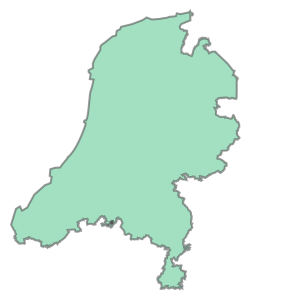

In [21]:
## Results in a map
placesbound

In [32]:
geometry_Cut = ox.utils_geo._quadrat_cut_geometry(placesbound, quadrat_width = 10000)


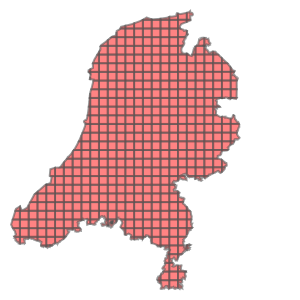

In [48]:
geometry_Cut

In [28]:
print(type(geometry_cut))

<class 'shapely.geometry.multipolygon.MultiPolygon'>


In [29]:
## Area of the cut geometry
geometry_cut.area

83826638.03944647

In [30]:

geometry_cut.is_valid

False

### unary_union
Returns a representation of the union of the given geometric objects.


Areas of overlapping Polygons will get merged. LineStrings will get fully dissolved and noded. Duplicate Points will get merged.

In [41]:
unary_union(placeGeometry).is_valid

True

In [42]:
polylist = [p for p in geometry_cut]

In [43]:
len(polylist)

117

In [50]:
polylist

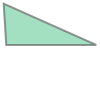

In [46]:
polylist[116]

In [47]:
west, south, east, north = unary_union(placesbound).bounds

### Point
polygon.representative_point()

### Coordinates
.coords[:] ## Get all with ":"

### Access to the tuple
[0]

fc = face colour (white)
ec = edge colour (black)
alpha = transparency
zorder = order of 2 for multiple layer. Higher number more priority


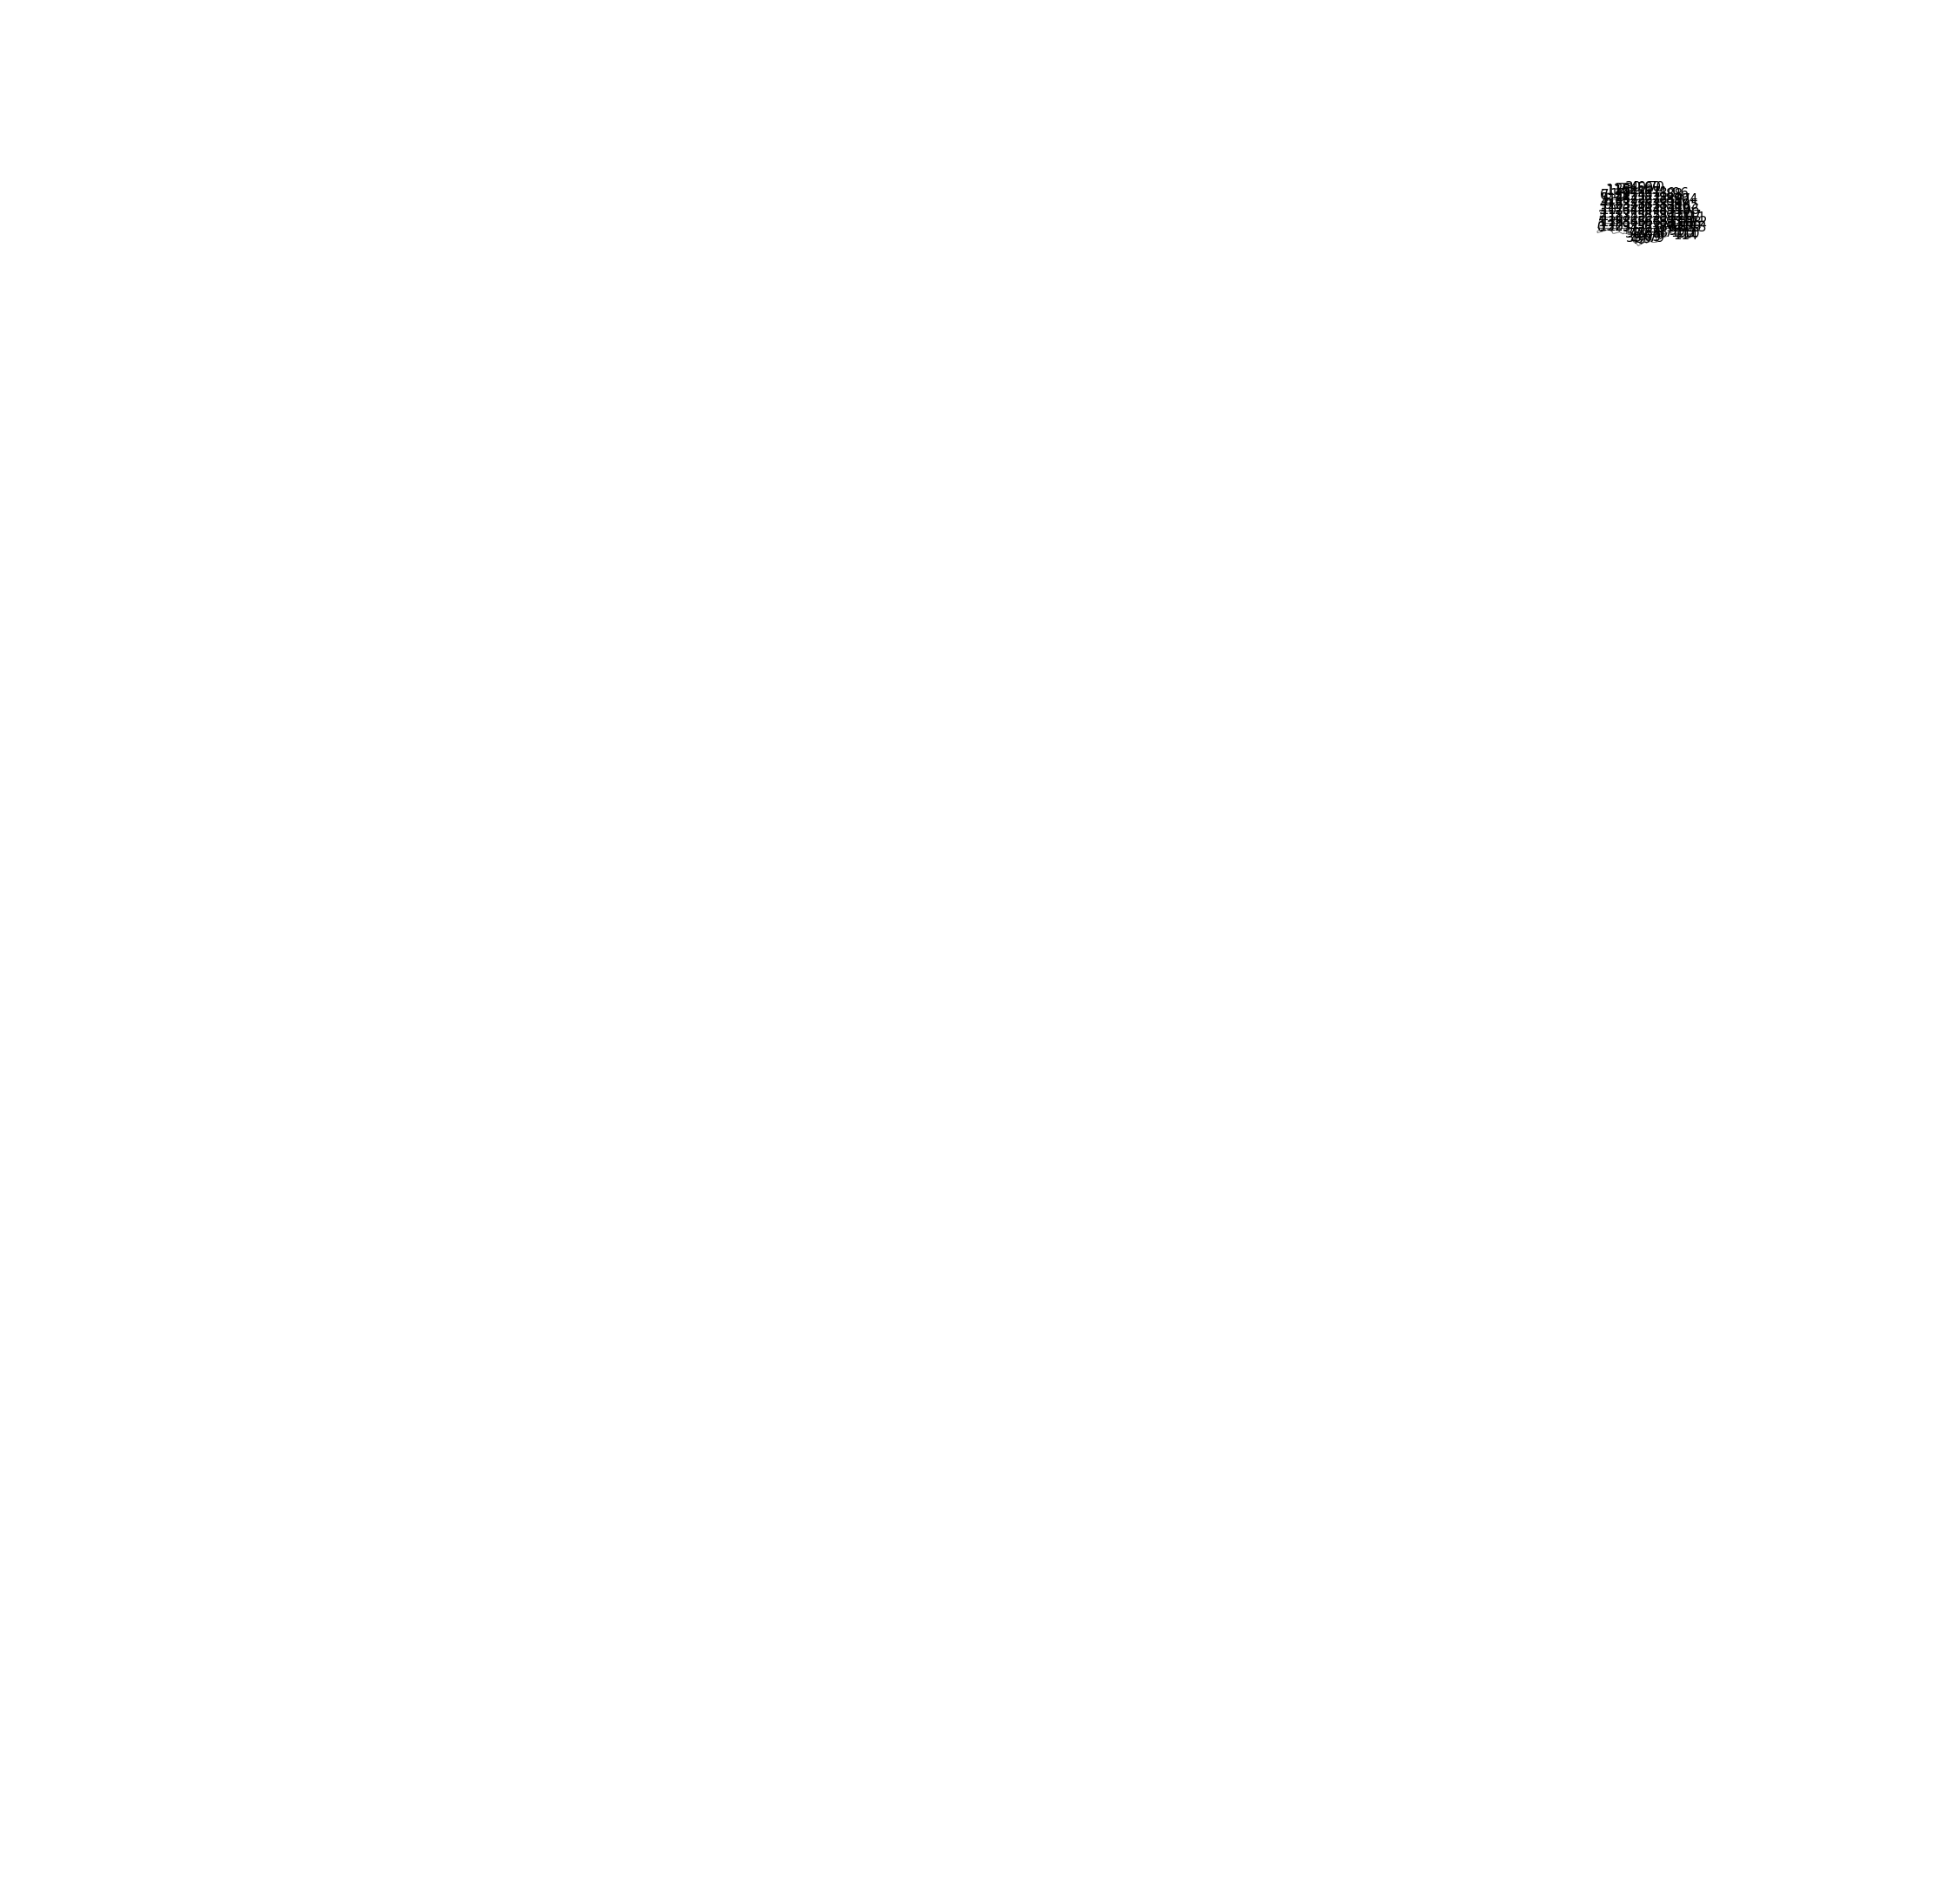

In [49]:
fig, ax = plt.subplots(figsize=(40,40))
## ax = structure of the plot
for polygon, n in zip(geometry_cut, np.arange(len(polylist))):
    p = polygon.representative_point().coords[:][0]
    ## patch polygon
    patch = PolygonPatch(polygon, fc='#ffffff', ec='#000000', alpha=0.5, zorder=2)
    ## add the patch to the drawing
    ax.add_patch(patch)
    ## s = number to annotate here = n
    plt.annotate(text = n, xy = p, horizontalalignment='center', size = 15)

ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.axis('off')
plt.show()

In [68]:
from shapely.ops import unary_union
unary_union(geometry_cut).area
unary_union(geometry_cut).is_valid

True

In [121]:
polyframe = gpd.GeoDataFrame(geometry=polylist)
polyframe
#polyframe.crs = place.crs
#print (polyframe.crs)


,geometry
0,"POLYGON ((731260.488 5900338.193, 731285.637 5..."
1,"POLYGON ((731431.071 5900886.707, 731429.847 5..."
2,"POLYGON ((731518.469 5901849.467, 731519.368 5..."
3,"POLYGON ((731703.156 5902812.228, 731709.210 5..."
4,"POLYGON ((731888.356 5903774.988, 731889.319 5..."
...,...
112,"POLYGON ((744214.662 5901849.467, 744221.940 5..."
113,"POLYGON ((744731.230 5900886.707, 744720.534 5..."
114,"POLYGON ((742941.061 5899168.113, 742938.354 5..."
115,"POLYGON ((734180.631 5906334.458, 734179.004 5..."


In [122]:
place.crs

AttributeError: 'Polygon' object has no attribute 'crs'

In [91]:
place.unary_union.bounds

AttributeError: 'Polygon' object has no attribute 'unary_union'

In [118]:
type(polylist)

list

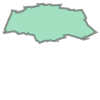

In [51]:
polylist[0]

In [119]:
np.arange([polylist])

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [53]:
west, south, east, north = nl.unary_union.bound

fig, ax = plt.subplots(figsize=(40,40))
for polygon, n in zip(geometry_cut, np.range(polylist)):
    p = polygon.representative_point().coords[:][0]
    patch = PolygonPatch(polygon, fc='#ffffff', ec='#000000', alpha=0.5, zorder=0.2)
    ax.add_patch(patch)
    plt.annotate(s=n, xy=p, horizontal_alignment='center', size =15)

AttributeError: 'MultiPolygon' object has no attribute 'bound'

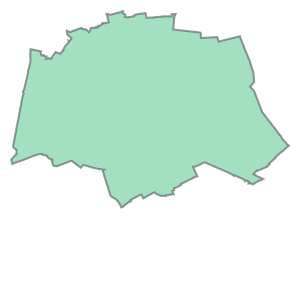

In [35]:
placeGeometry

polylist = [p for p in geometry_cut]